<a href="https://colab.research.google.com/github/Akyadavv/EDA/blob/master/EDA_PROJECT_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Have you ever questioned when the ideal time of year is to reserve a hotel room? Alternatively, how long should I remain to get the greatest daily rate? What if you wanted to foretell whether a hotel would unreasonably frequently receive unusual requests? You can investigate those questions using the data from hotel reservations! This data collection comprises reservation details for a city hotel and a resort hotel, as well as details like the date the reservation was made, the duration of the stay, the number of adults, kids, and/or babies, and the number of parking spaces that are available. The data is devoid of any information that may be used to identify a specific person.

In this project I explored this dataset with a goal in my mind to find out hidden insights in the data that could help the hotels to grow their business.
To perform the analysis I used  python packages like pandas and for visualization used matplotlib.pyplot and seaborn libraries. Approach I followed is to make use visualization to find out underlying trends and patterns among the features, and with the help of my business acumen generated insights.
Insights are in the conclusion section at bottom.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Explore and analyse the data to discover important factors that govern the bookings.Following are the question that I tried to answer in this project** 

1. What are the cancellation rates of Hotels ? which hotel has higher cancellation rate.
2. .  what is the trend booking per month over the years.
3.  which type of room customers prefered over others.
4.  is any realtion between lead time cancellation rate or deposit type?
5. Favorite food type among customers.
6. most frequent no. of days room were booked for
7. Nationality of customers
8. how many are repeated guests? 

#### **Define Your Business Objective?**

To find out insights from the data that could help hotels to increase their business .It will make them aware about area where they can improve upon and take actionable towards that.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projects data/Hotel Bookings.csv')

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns', None)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].shape

(31994, 32)

In [ ]:
# Droping duplicate values
df.drop_duplicates(inplace = True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


<Axes: >

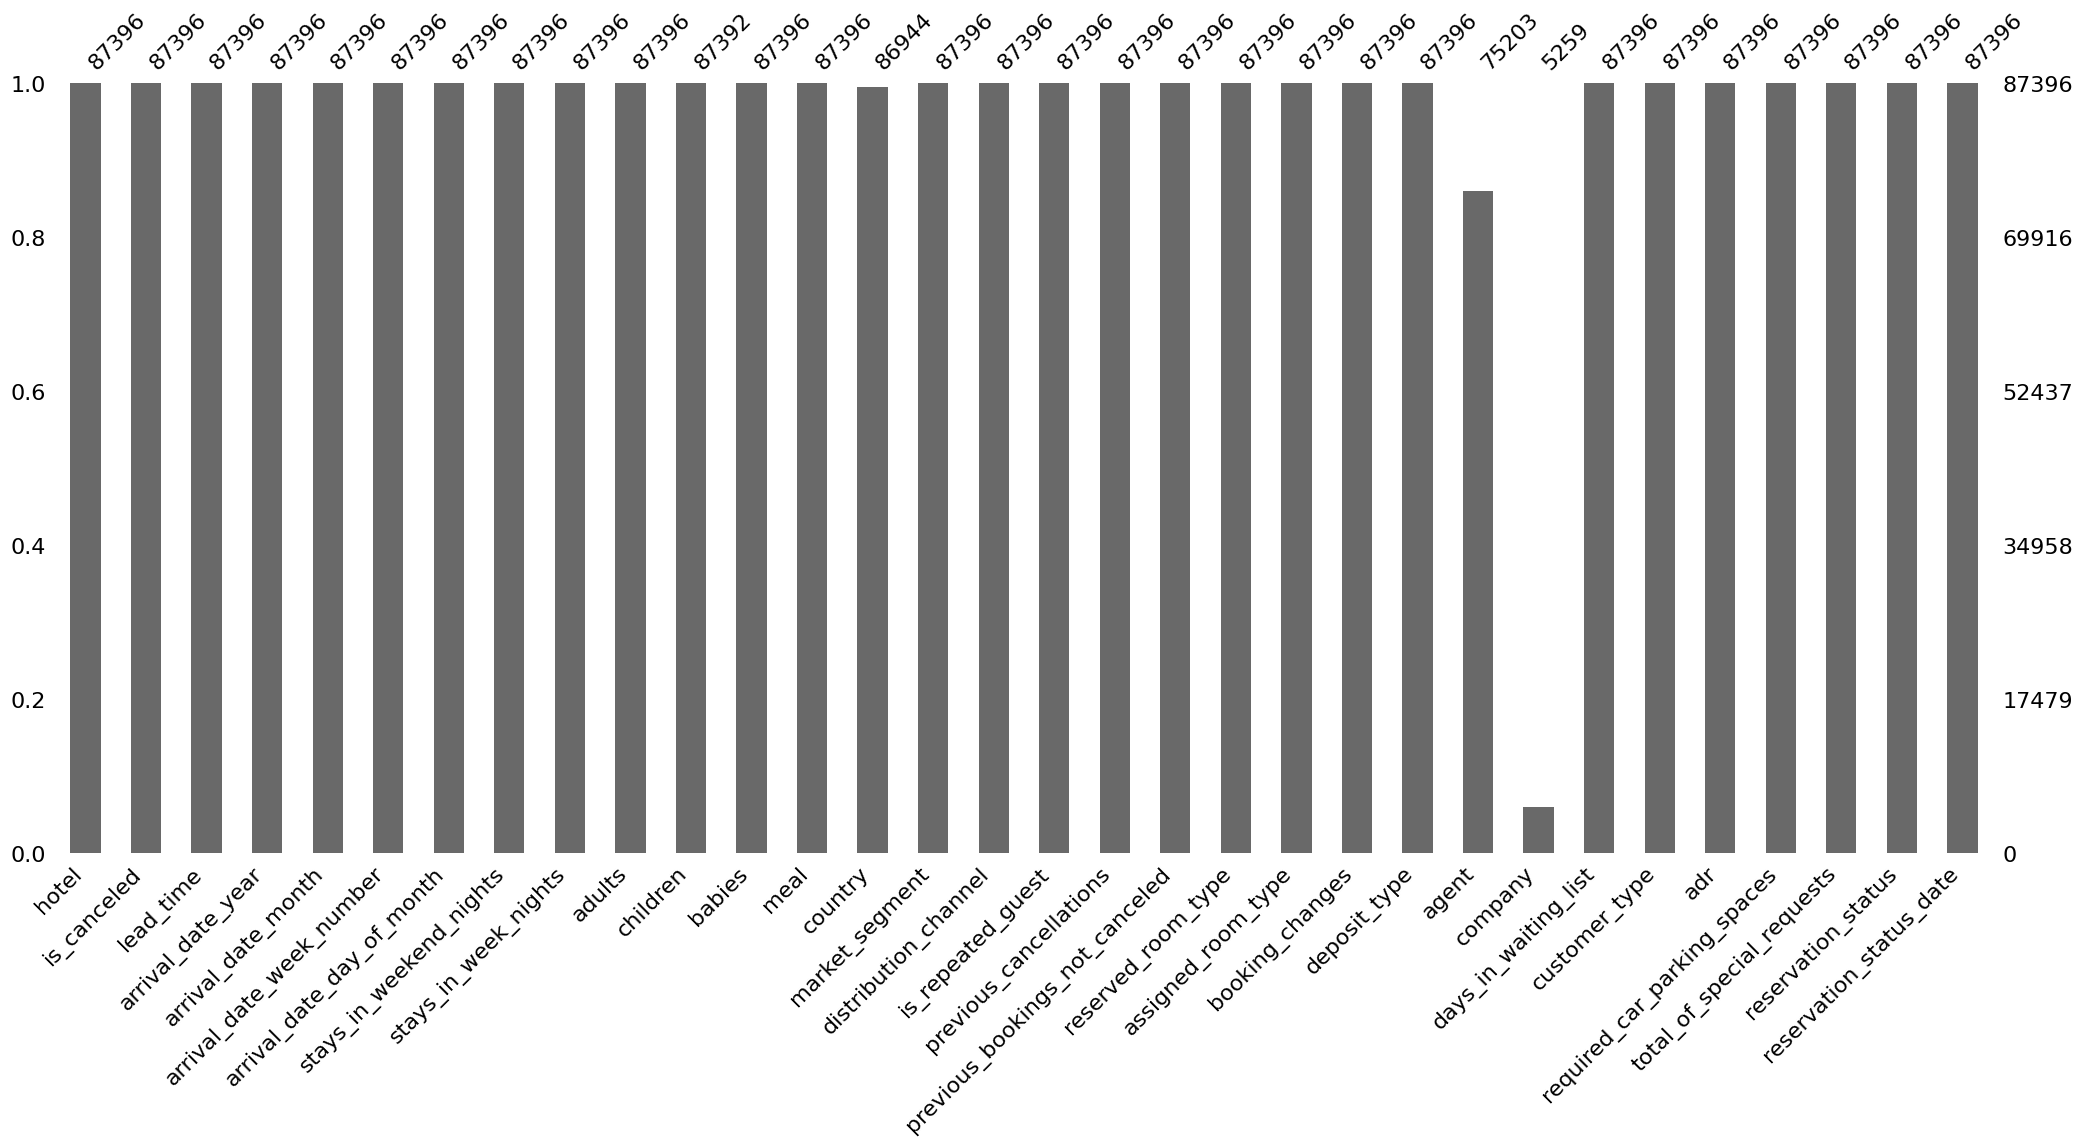

In [ ]:
# Visualizing the missing values
msno.bar(df)

In [ ]:
# dealing with null values
df = df.drop(['company'], axis=1)
df = df[df['country'].notna()]
df['agent'] = df['agent'].fillna(df['agent'].median())
df['children'] = df['children'].fillna(df['children'].median()) 

<ipython-input-11-c810ce9691a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent'] = df['agent'].fillna(df['agent'].median())
<ipython-input-11-c810ce9691a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].fillna(df['children'].median())


### What did you know about your dataset?

* Dataset contains booking information of two hotels. 
* Dataset has 119390 rows and 32 features.
* It had 31994 duplicate values.
* Mainly three columns have null values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

is_canceled     lead_time  arrival_date_year  \
count  86944.000000  86944.000000       86944.000000   
mean       0.275936     80.189823        2016.211768   
std        0.446987     86.099761           0.686049   
min        0.000000      0.000000        2015.000000   
25%        0.000000     12.000000        2016.000000   
50%        0.000000     50.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              86944.000000               86944.000000   
mean                  26.841726                  15.817595   
std                   13.654240                   8.834531   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             86944.000000          86944.000000  86944.000000   
mean                  1.007384              2.628727      1.878543   
std                   1.028757              2.043744      0.625858   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  16.000000             41.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  86944.000000  86944.000000       86944.000000            86944.000000   
mean       0.139205      0.010835           0.039232                0.030226   
std        0.456777      0.113590           0.194148                0.369566   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    86944.000000     86944.000000  86944.000000   
mean                         0.176700         0.271842     83.019656   
std                          1.717846         0.728076    108.631073   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     14.000000   
75%                          0.000000         0.000000    240.000000   
max                         72.000000        21.000000    535.000000   

       days_in_waiting_list           adr  required_car_parking_spaces  \
count          86944.000000  86944.000000                 86944.000000   
mean               0.753462    106.571263                     0.083445   
std               10.041586     54.958962                     0.280396   
min                0.000000     -6.380000                     0.000000   
25%                0.000000     72.250000                     0.000000   
50%                0.000000     98.400000                     0.000000   
75%                0.000000    134.100000                     0.000000   
max              391.000000   5400.000000                     8.000000   

       total_of_special_requests  
count               86944.000000  
mean                    0.699485  
std                     0.831835  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.00000

### Variables Description 

'hotel' - H1 = Resort Hotel, H2 = City Hotel

'is_canceled' - If the booking was cancelled(1) or not(0)

'lead_time' - Number of days that elapsed between entering date of the booking into PMS and the arrival date 

'arrival_date_year'- Year of arrival date

'arrival_date_month' - Month of arrival date 

'arrival_date_week_number'- Week number of arrival date

'arrival_date_day_of_month'-Day of arrival date

'stays_in_weekend_nights'-Number of nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

'stays_in_week_nights'- Number of nights (Monday to Friday) the guest stayed or booked to stay at the hotel

'adults' - Number of adults

'children'- Number of children

'babies' - Number of babies

'meal'- Kind of meal opted for

'country' - Country code

'market_segment' - Which segment the customer belongs to

'distribution_channel' - How the customer accessed the stay-coporate booking/Direct/TA.TO

'is_repeated_guest' - Guest coming for the first time or not 

'previous_cancellations' - was there a cancellation before

'previous_bookings_not_canceled' - Count of previous booking

'reserved_room_type' -Type of room reserved 

'assigned_room_type' - Type of room assigned

'booking_changes'- Count of changes made to booking.

'deposit_type' - Deposit type

'agent' - Booked throgh agent 

'days_in_waiting_list' - Number of days in waiting list

'customer_type' -Type of customer

'adr' - Average_daily_rate

'required_car_parking_spaces' - If parking is required 

'total_of_special_requests' - Number of additional special requirements 

'reservation_status' - Reservation of status

'reservation_status_date' - Date of the specific status

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
count = []
for col in df.columns:
  count.append(df[col].nunique())

count_df = pd.DataFrame(list(zip(df.columns, count)),
               columns =['variable', 'unique_count'])
count_df

variable  unique_count
0                            hotel             2
1                      is_canceled             2
2                        lead_time           479
3                arrival_date_year             3
4               arrival_date_month            12
5         arrival_date_week_number            53
6        arrival_date_day_of_month            31
7          stays_in_weekend_nights            15
8             stays_in_week_nights            33
9                           adults            14
10                        children             5
11                          babies             5
12                            meal             5
13                         country           177
14                  market_segment             8
15            distribution_channel             5
16               is_repeated_guest             2
17          previous_cancellations            15
18  previous_bookings_not_canceled            73
19              reserved_room_type            10
20              assigned_room_type            12
21                 booking_changes            21
22                    deposit_type             3
23                           agent           332
24            days_in_waiting_list           128
25                   customer_type             4
26                             adr          8870
27     required_car_parking_spaces             5
28       total_of_special_requests             6
29              reservation_status             3
30         reservation_status_date           926

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['no_nights'] = df['stays_in_week_nights'] +df['stays_in_weekend_nights']
df['no_nights']
df_city = df[df['hotel'] == "City Hotel" ]
df_resort = df[df['hotel'] == "Resort Hotel" ]

### What all manipulations have you done and insights you found?

- Created new feature calles no_nights , which is basically total no. of nights the booking was done for.
- Created new dataframe for each of the two hotel so that operation can be done on them individually

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 300x100 with 0 Axes>

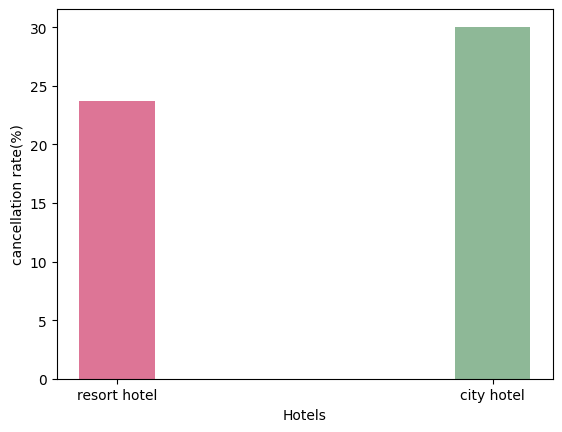

<Figure size 300x100 with 0 Axes>

In [ ]:

# Cancellation rate of the two hotels in the dataframe
resort_cr = len(df_resort[df_resort['is_canceled']==1])/len(df_resort) * 100                                  # cancellation rate of hotel resort
city_cr = len(df_city[df_city['is_canceled']==1])/len(df_city) * 100                                          # cancellation rate of hotel city
plt.bar(["resort hotel" , "city hotel"],[resort_cr,city_cr], width = 0.2 ,color = ['#DD7596', '#8EB897'])
plt.xlabel('Hotels')
plt.ylabel('cancellation rate(%)')
plt.figure(figsize=(3,1))

##### 1. Why did you pick the specific chart?

Picked bar chart to show the difference between the two hotels 

##### 2. What is/are the insight(s) found from the chart?

City hotel has higher cancellation rate than resort hotel.

Generally 20-30% bookings get cancelled.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insight will make city hotel's administration aware of high cancellation rate. So they find out the reason further and take actionable steps to fix it 

#### Chart - 2

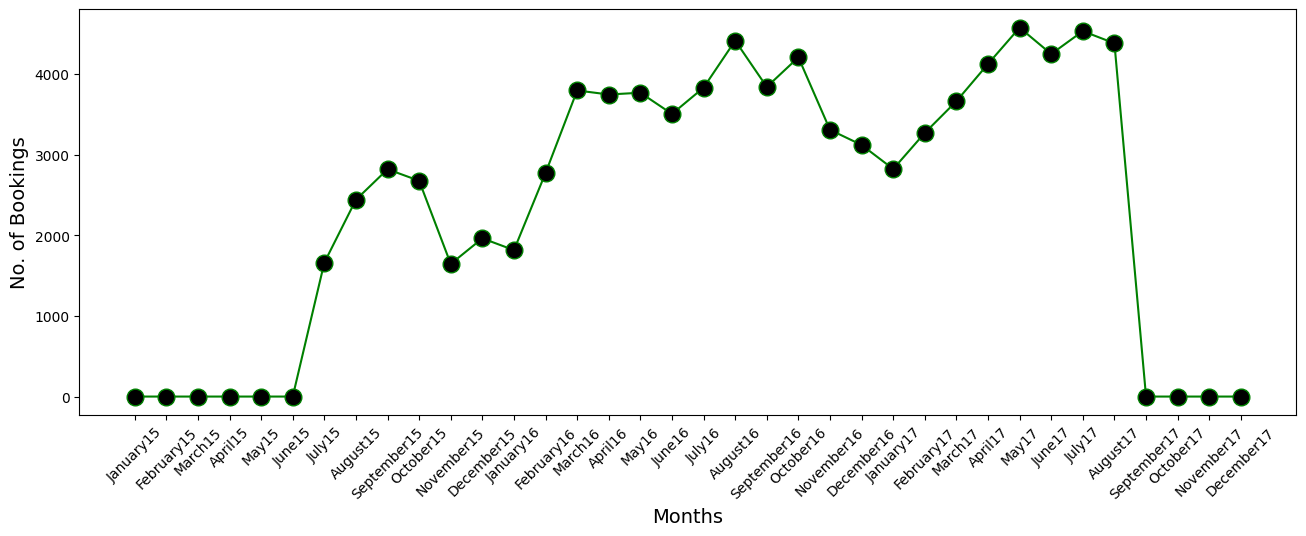

In [ ]:
# Chart - Bookings per month over  a period
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # list of months
counts = [0,0,0,0,0,0,0,0,0,0,0,0]                                 # list of zeros
def create_df(year):                                               # Function to count no. of booking for a particular year , returns dataframe
  new_df = pd.DataFrame({"months": [x+str(year)[-2:] for x in months] , "counts":counts})
  for i in months:
    new_df.loc[new_df['months'] == i+str(year)[-2:] ,'counts'] = len(df.loc[(df['arrival_date_year']==year) & (df['arrival_date_month']== i)])
  return new_df
data_15 = create_df(2015)
data_16 = create_df(2016)
data_17 = create_df(2017)
concated = pd.concat([data_15, data_16 , data_17])
plt.figure(figsize=(15.7,5.27))
plt.plot(concated['months'] , concated['counts'],color = 'green',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'black', markersize = 12 )
plt.xlabel("Months",fontsize=14)
plt.ylabel("No. of Bookings", fontsize=14)
plt.xticks(rotation=45)
plt.show()




##### 1. Why did you pick the specific chart?

Picked line chart to show the no. of bookings per month over a period of time because in line charts its easy to find any trend for a large data points and its more clean than other charts. 

##### 2. What is/are the insight(s) found from the chart?

Chart shows a trend that April to sept are busiest time of the year for hotels and to the end of the year from sept to dec bookings were less.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insight will alert them to be ready for busiest time of year. So that they can organize the resourcess that will be required in that period. 

#### Chart - 3

<Axes: ylabel='reserved_room_type'>

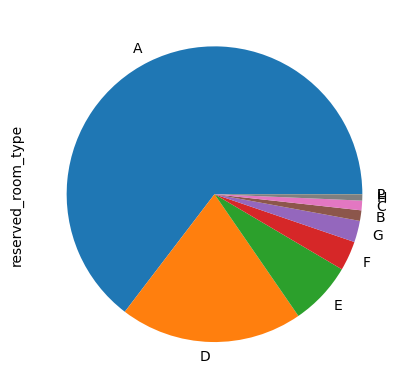

In [ ]:
# plot show preferences of the customers

df['reserved_room_type'].value_counts().plot(kind = "pie")

##### 1. Why did you pick the specific chart?

To show which type of room was preferred by the customers.

##### 2. What is/are the insight(s) found from the chart?

Room type A is preferred by most of the customers and room type D is the second favourite.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes this insights shows the taste of customers and what they prefer.

#### Chart - 4

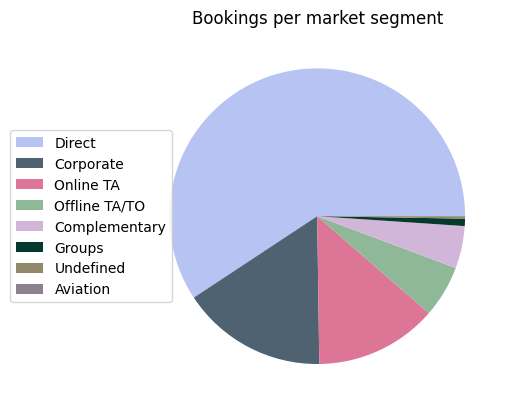

In [ ]:
# Chart - Booking per market segment
colors = ['#B7C3F3','#4F6272',  '#DD7596', '#8EB897', '#D2B6D9','#05392D','#918967','#8C8191']
labels =['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation']
counts = df['market_segment'].value_counts()
patches, text = plt.pie(counts, colors=colors)
plt.title('Bookings per market segment')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.35, .5))

##### 1. Why did you pick the specific chart?

Picked this pie chart to show from which market segment customers are coming from  

##### 2. What is/are the insight(s) found from the chart?

Most booking were from direct customers and after that from corporate.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes this Insight will give them information that which market segments  need more marketing.

#### Chart - 5

Text(0, 0.5, 'Cancelations [%]')

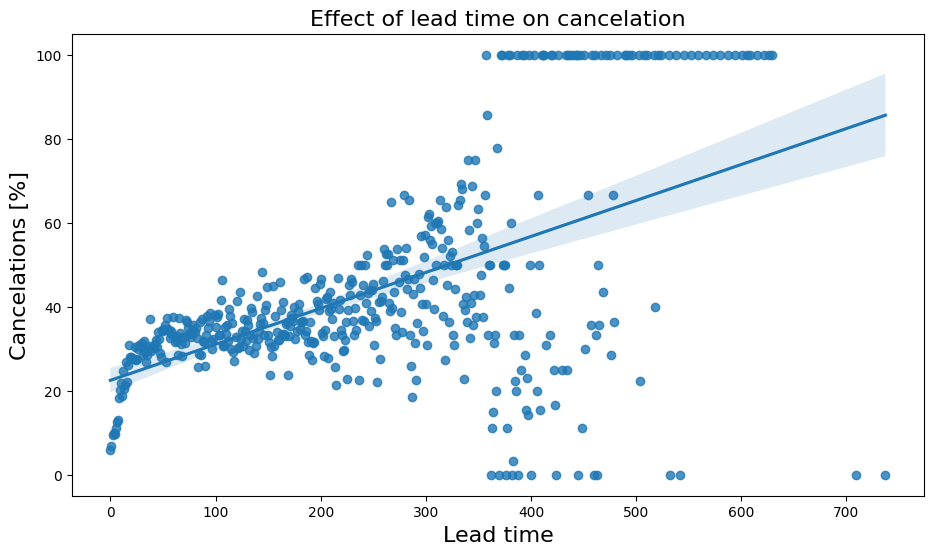

In [ ]:
# Regplot showing relation between lead time and cancellation.

lead_time_df = df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(11, 6))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

##### 1. Why did you pick the specific chart?

To analyse effect of lead time on cancellation rate.

##### 2. What is/are the insight(s) found from the chart?

cancellation rate is positively correlated to the lead time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes using this insight business now can find out the solution to deal with high lead time . One solution could be giving them some discount.

#### Chart - 6

Text(0, 0.5, 'Cancelations [%]')

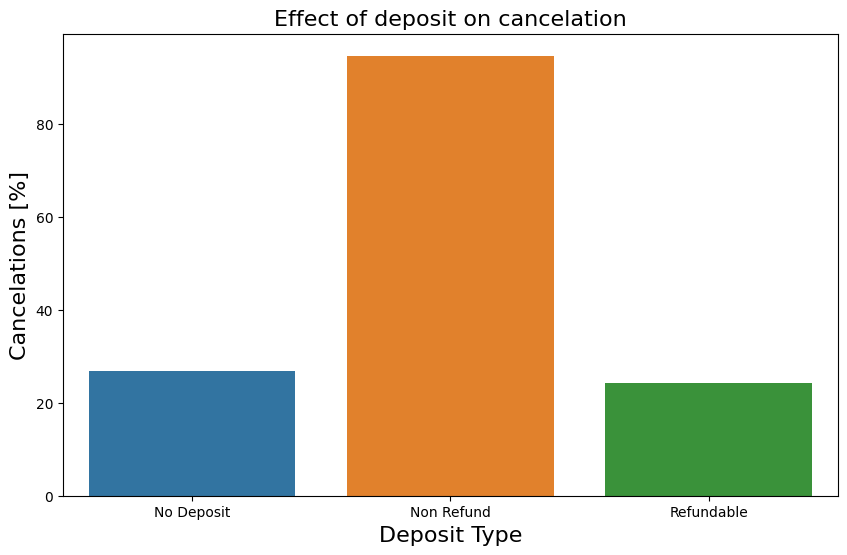

In [ ]:

# Barplot to show which deposit type affects cancellation more.

deposit_df = df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(10, 6))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

##### 1. Why did you pick the specific chart?

To check relationship between deposit type and cancellation rate.

##### 2. What is/are the insight(s) found from the chart?

Non refund deposit type had higher cancellation rate.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

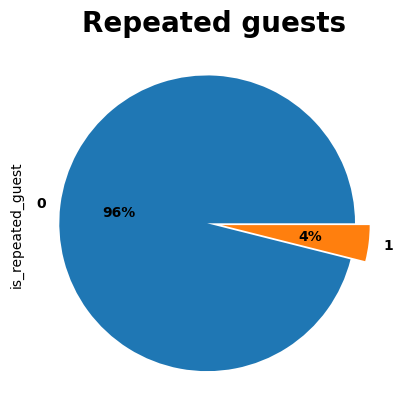

In [ ]:
# Chart - repeated guest percentage 
Repeated = df['is_repeated_guest'] .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =20);

##### 1. Why did you pick the specific chart?

customer retention is important fo any business. Repeated no. of guest shows how well the businees is doing.

##### 2. What is/are the insight(s) found from the chart?

Repeated no. of guest are very low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this insight  will force stakeholders to work towards increasing the repeatention of customers by providing them offers or conducting a survey of how was the stay of the guests to know the reason behind the low customer retention.

#### Chart - 8

Text(0.5, 1.0, 'Number of bookings country wise')

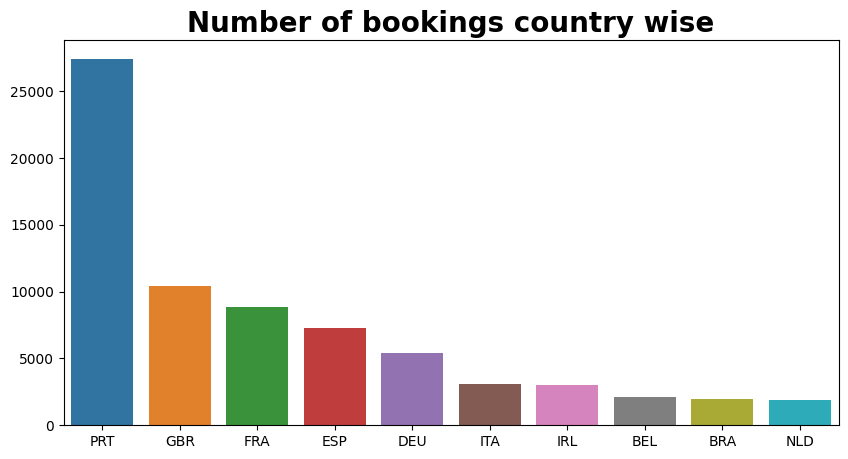

In [ ]:
# Chart -  Number of bookings country wise
plt.figure(figsize = (10,5))

sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)

#list(Hotel_df.country.value_counts().head (10))-->[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104]
#list(Hotel_df.country.value_counts().head(10).index)-->['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

##### 1. Why did you pick the specific chart?

To find out from which coutries are guests coming from.

##### 2. What is/are the insight(s) found from the chart?

Largest no. of customers com from portugal(PRT)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , this will give the knowledge about the target customers nationality. Using which stakeholders can do marketing in those countries.

#### Chart - 9

Text(0.5, 1.0, 'Average daily rate month wise')

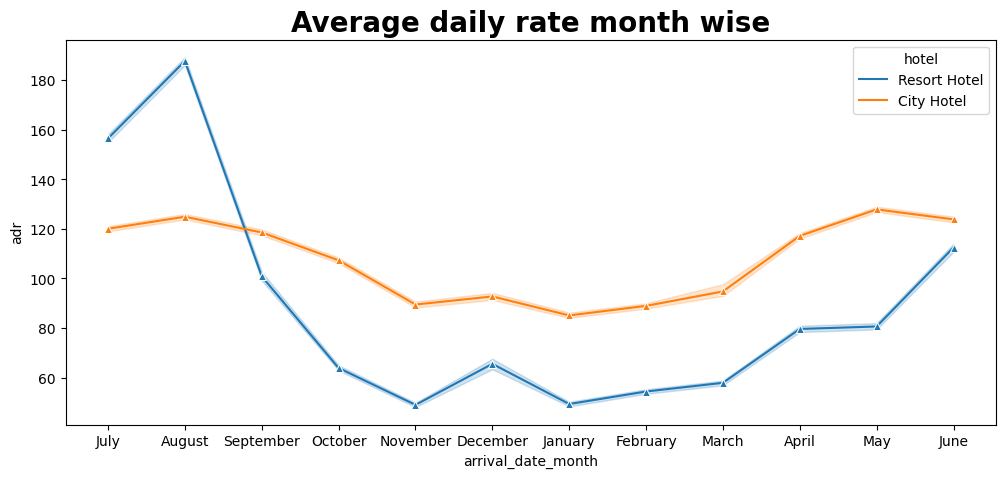

In [ ]:
# Chart - average daily rate month wise
plt.figure(figsize=(12,5))
sns.lineplot(data = df, x = 'arrival_date_month', y = 'adr', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

##### 1. Why did you pick the specific chart?

To find out underlying trend for Average daily rate across months


##### 2. What is/are the insight(s) found from the chart?

Apart from July and August, In every other month adr was higher for city hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insight can be usefull for price formulation .

#### Chart - 10

Text(0.5, 1.0, 'required_parking_spaces')

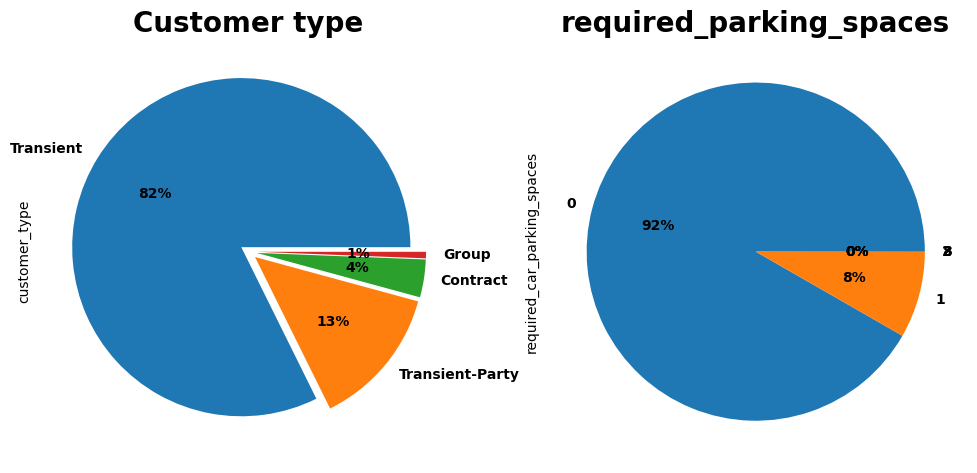

In [ ]:
# Chart - customer type and parking preferences
df.customer_type.nunique()
Customer_typ = df.customer_type .value_counts()
plt.figure(figsize =(12,12))
plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4) 
plt.title('Customer type',fontweight="bold", size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(1,2,2)
Car_parking_spaces = df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20)

##### 1. Why did you pick the specific chart?

To know more about customers booking the hotel and what their preferences.

##### 2. What is/are the insight(s) found from the chart?

* 82 % of customers are of transient type.
* Only 8% of them required parking space.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By know the knowing more about Hotel could provide them better services. For example most customer does not have a vehicle ,So hotel can provide cab services as well.

#### Chart - 11

Text(0.5, 1.0, 'No. of Nights most bookings were for')

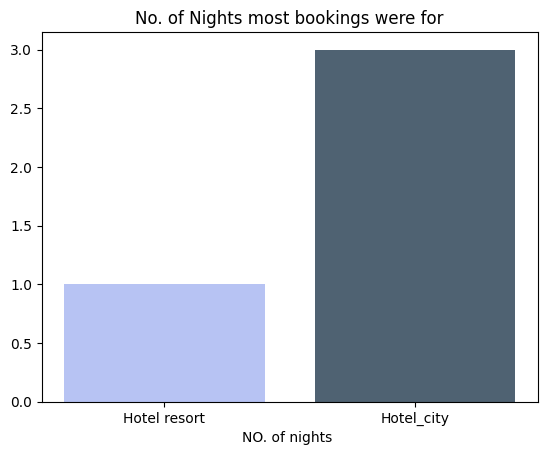

In [ ]:
# Chart - most frequent no. of days room were booked for
plt.bar(['Hotel resort' ,'Hotel_city'],[ df_resort['no_nights'].mode()[0],  df_city['no_nights'].mode()[0]] , color = ['#B7C3F3','#4F6272'])
plt.xlabel("Hotels")
plt.xlabel("NO. of nights ")
plt.title("No. of Nights most bookings were for")

##### 1. Why did you pick the specific chart?

To now usually customers book rooms for how many days. this will help knowing behaviour of customers which can be to make various decisions 

##### 2. What is/are the insight(s) found from the chart?

Customers book a room in hotel resort usually for one day and for three days in hotel_city.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yeah it will create a postive impact as it will help in decision making. For example by having this information now hotel city can make a 3 nights package  with discounted price to attract more customers.

#### Chart - 12

Text(0.5, 1.0, 'Favourite food type')

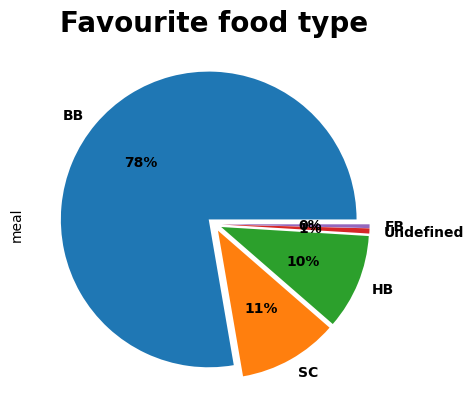

In [ ]:
# Chart - 12 favourite food type
meal_typ = df['meal'].value_counts()
meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*5)
plt.title('Favourite food type',fontweight="bold", size=20)

##### 1. Why did you pick the specific chart?

To show Food preference of the customers

##### 2. What is/are the insight(s) found from the chart?

B --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)

AS we can see 78% of people prefer 'BB' type meal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight help in smoth operation of Hotel's kitechen.

#### Chart - 13

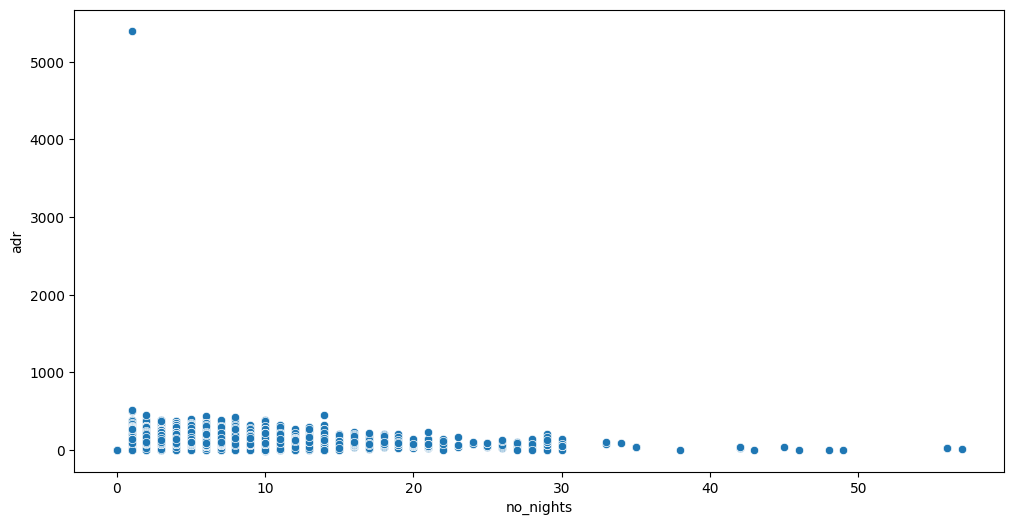

In [ ]:
# Chart - adr and no_ninght analysis
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'no_nights', data = df)
plt.show()

In [ ]:
df.drop(df[df['adr'] > 5000].index, inplace = True) # Removing all values > 5000 

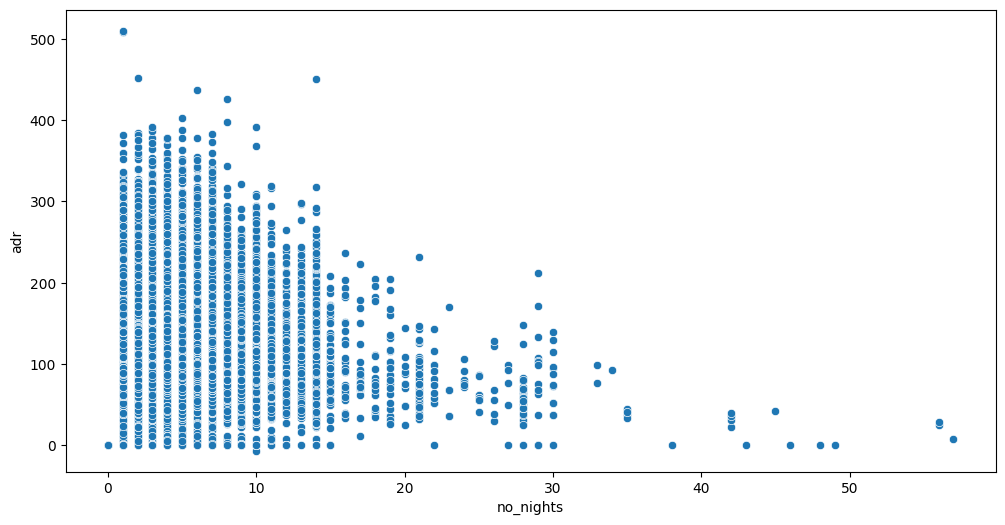

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'no_nights', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

To see the relationship between average daily rate and number of nights customer spent in the hotel

##### 2. What is/are the insight(s) found from the chart?

As the number of nights increases average daily rate decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This relationships can be used to give customers offer for booking for more no. of nights.

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-31ad6ad7a6ed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True)


<Axes: >

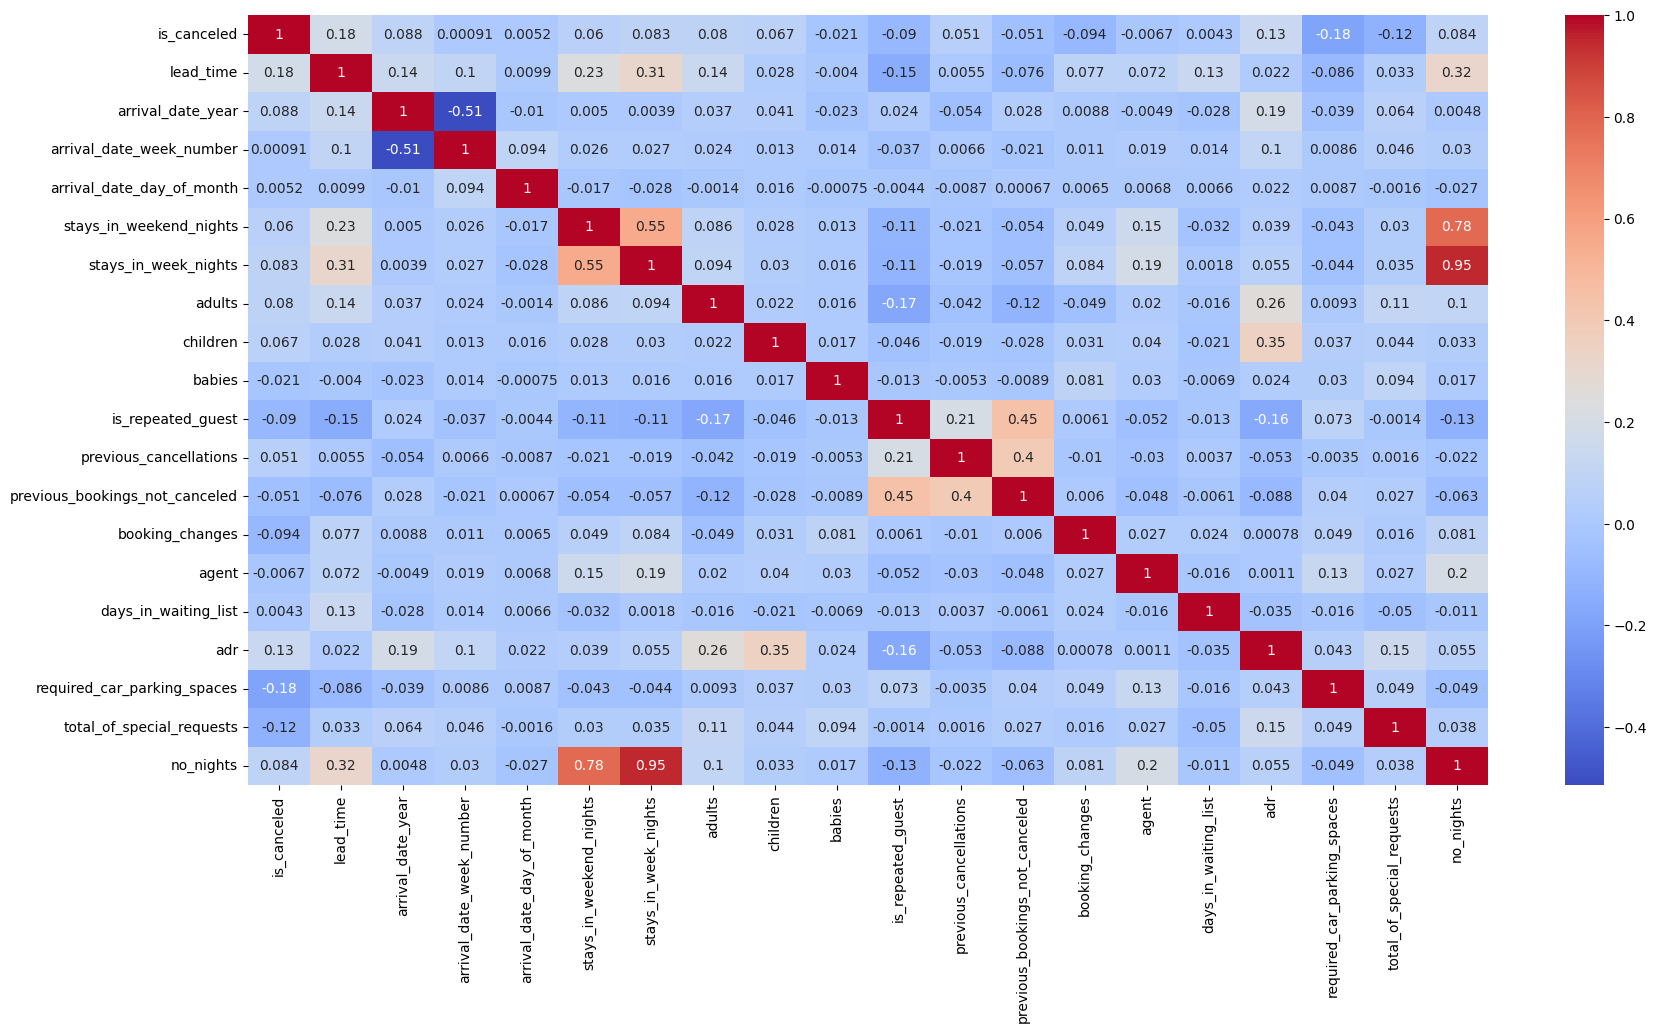

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

##### . What is/are the insight(s) found from the chart?

Is_repeated_guest has high correlation with previous_booking_not_cancelled

#### Chart - 15 - Pair Plot 

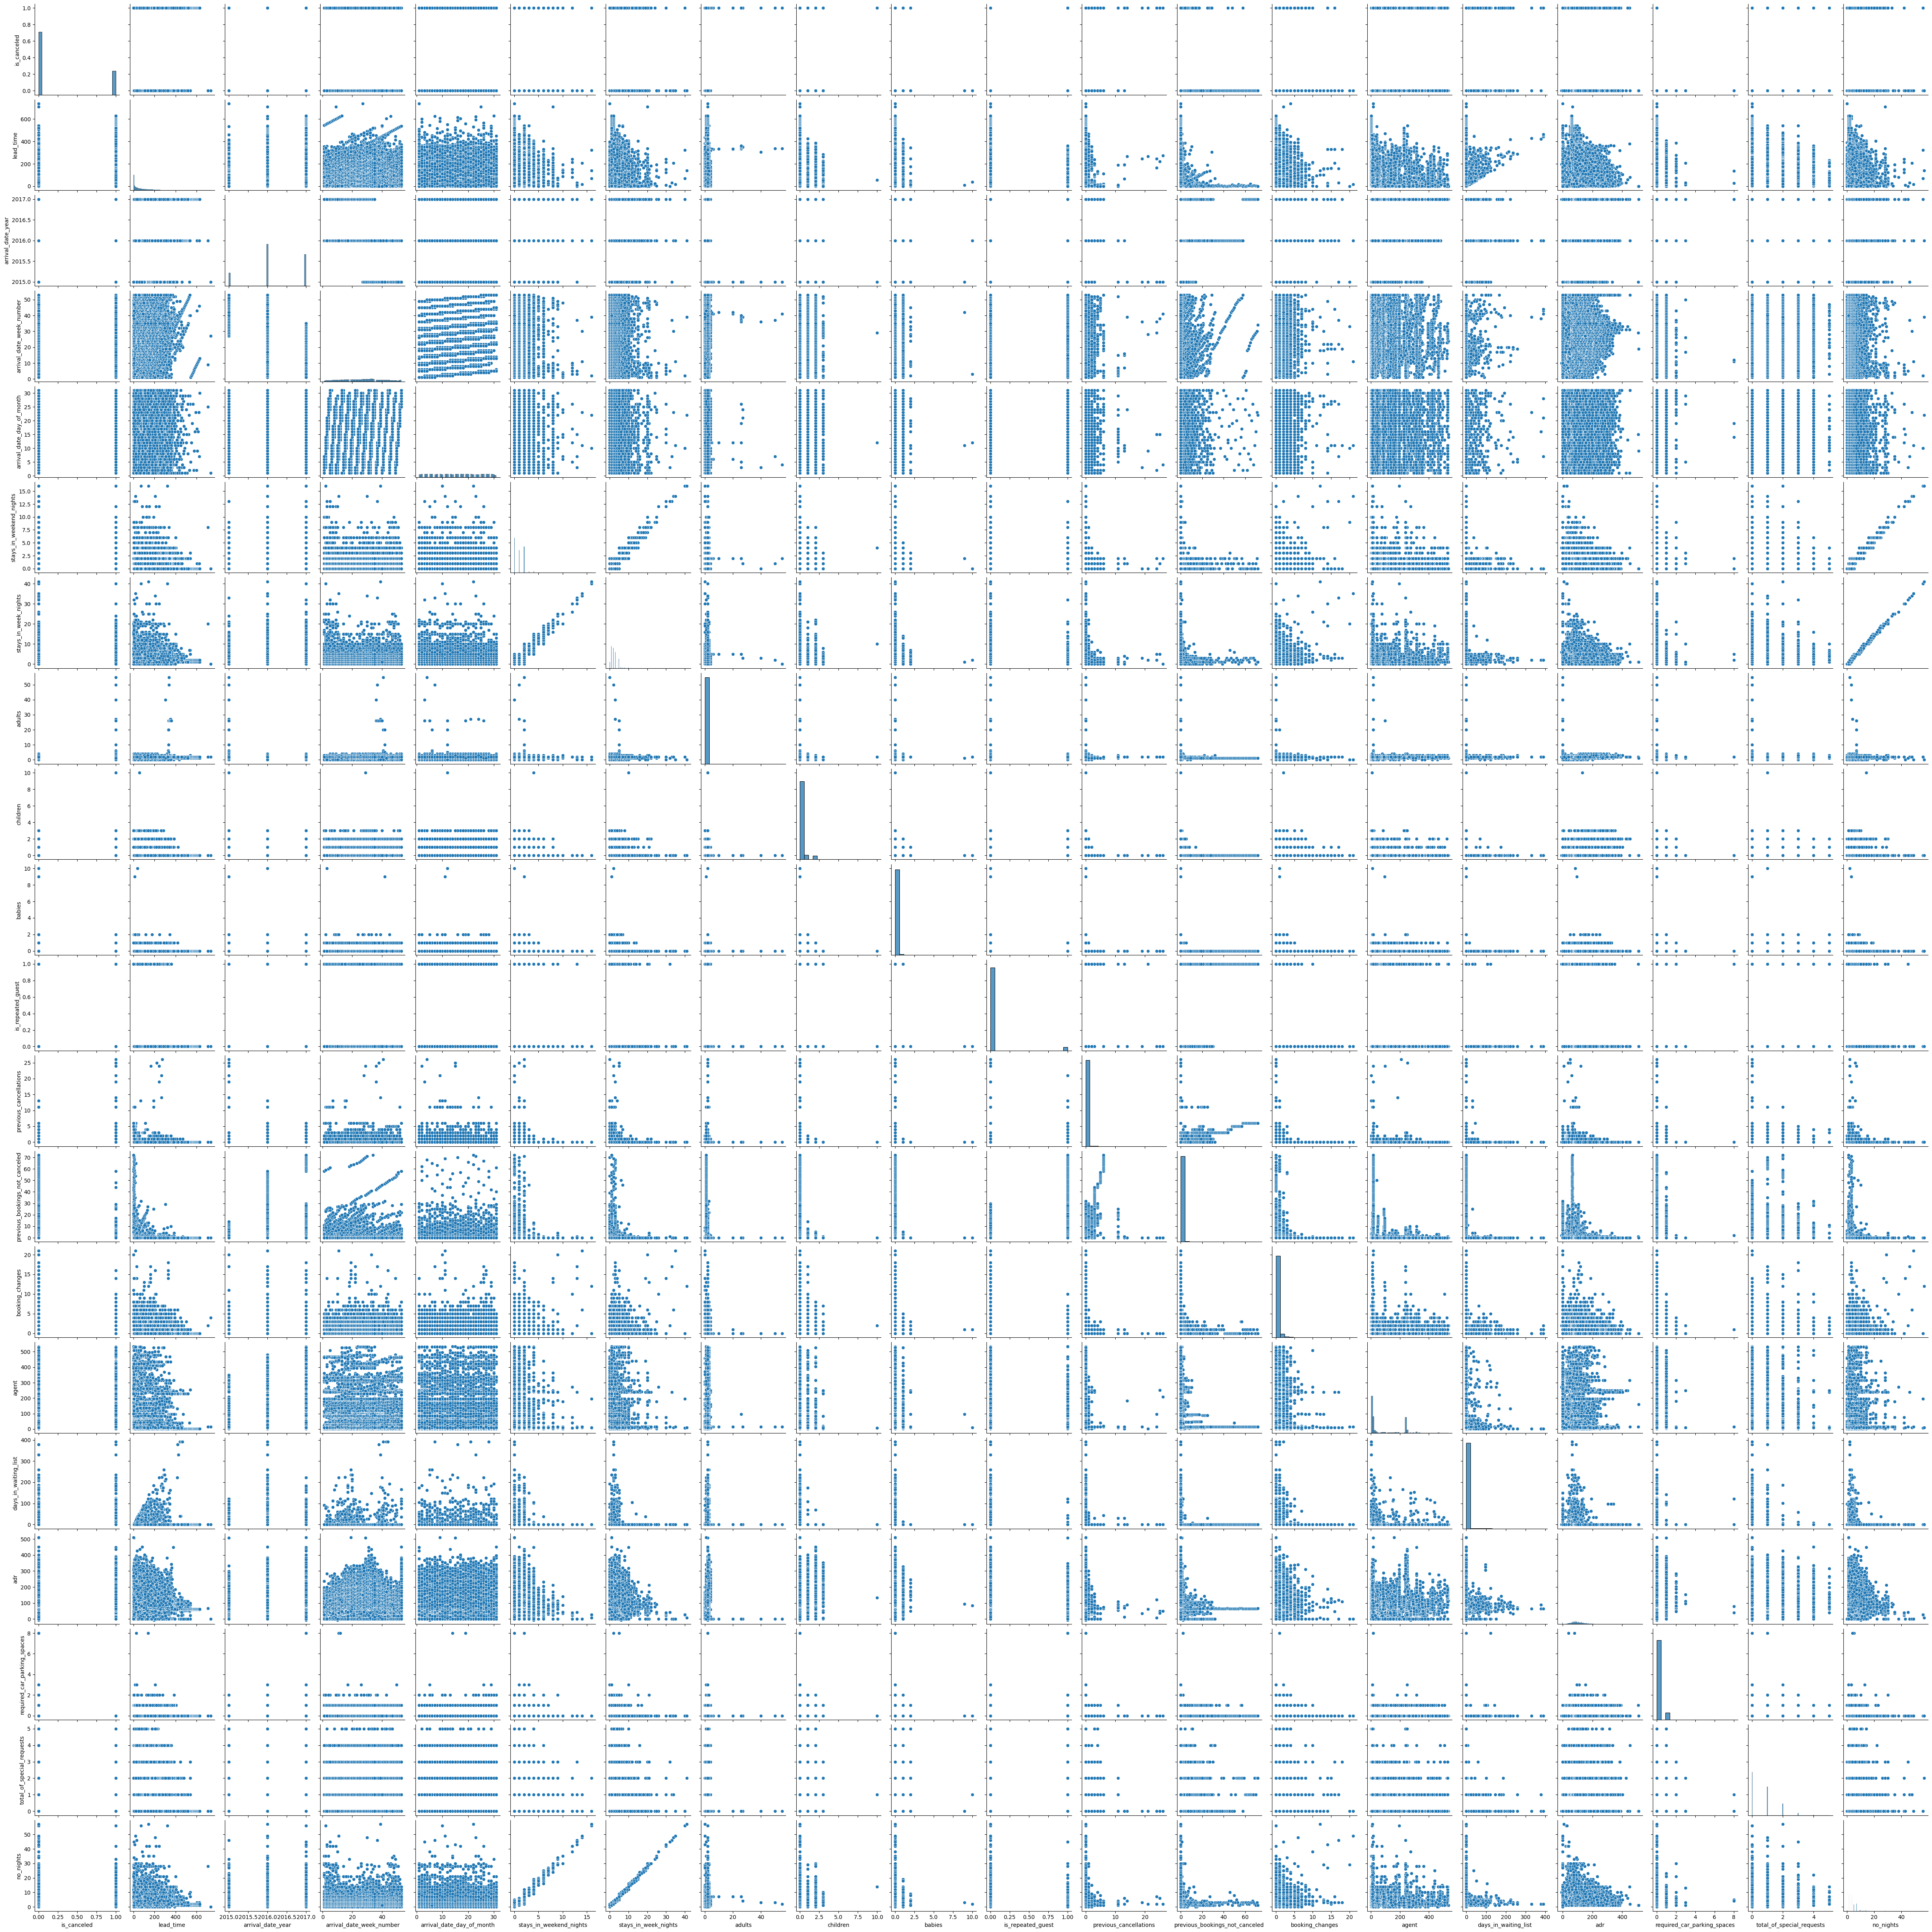

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### . What is/are the insight(s) found from the chart?

There are no other correlation apart from mentioned above.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

The insights I discovered while exploring the dataset are listed below. According to these insights, if hotels wish to grow their business, they must raise the number of repeat visitors because it is currently very low. They can introduce memberships or give loyal customers additional discounts to increase the number of repeat visitors. All additional insights can be used to get to know clients better and learn about their preferences in order to give them with services they will value and encourage them to stay at the same hotel again.

# **Conclusion**

* City hotel has higher cancellation rate than resort hotel.Generally 20-30% bookings get cancelled.

* April to sept are busiest time of the year for hotels and to the end of the year from sept to dec bookings were less.

* Room type A is preferred by most of the customers and room type D is the second favourite.

* Most booking were from direct customers and after that from corporate.
cancellation rate is positively correlated to the lead time.

* Non refund deposit type had higher cancellation rate.

* Repeated no. of guest are very low.

* Largest no. of customers com from portugal(PRT)

* Apart from July and August, In every other month adr was higher for city hotel.

* 82 % of customers are of transient type.

* Only 8% of them required parking space.

* Customers book a room in hotel resort usually for one day and for three days in hotel_city.

* B --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)
 78% of people prefer 'BB' type meal.

* As the number of nights increases average daily rate decreases.

* Is_repeated_guest has high correlation with previous_booking_not_cancel

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***